# CMI - Detect Behavior with Sensor Data

## 1. Background

-- Insert Description --

## 2. Import Libraries

In [212]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import set_matplotlib_formats

In [279]:
sns.set(
    style="whitegrid",
    context="notebook",
    rc={
        "figure.dpi": 100,
        "savefig.dpi": 300,
        "figure.facecolor": "white"  
    }
)
%matplotlib inline
%config InlineBackend.figure_format='retina'

## 3. Import Datasets

Data is separated into two datasets: sensor data (sen) and demographic and physical characteristics of the participants (dem).

In [40]:
%%time

# Import train and test CSV files
folder_path = './SensorData/input/'
print('Loading data...')

train_sen_df = pd.read_csv(f'{folder_path}train.csv')
print('\tSuccessfully loaded train_identity!')

train_dem_df = pd.read_csv(f'{folder_path}train_demographics.csv')
print('\tSuccessfully loaded train_demographics!')

test_sen_df  = pd.read_csv(f'{folder_path}test.csv')
print('\tSuccessfully loaded test!')

test_dem_df  = pd.read_csv(f'{folder_path}test_demographics.csv')
print('\tSuccessfully loaded test_demographics!')

print('Data was successfully loaded!\n')

Loading data...
	Successfully loaded train_identity!
	Successfully loaded train_demographics!
	Successfully loaded test!
	Successfully loaded test_demographics!
Data was successfully loaded!

CPU times: user 4.88 s, sys: 592 ms, total: 5.47 s
Wall time: 5.55 s


In [44]:
datasets = {
"Train Sensor Data": train_sen_df,
"Train Demographics": train_dem_df,
"Test Sensor Data": test_sen_df,
"Test Demographics": test_dem_df,
}

# Print shapes
for name, df in datasets.items():
num_rows, num_cols = df.shape
print(f"{name}:")
print(f"  Number of Rows: {num_rows}")
print(f"  Number of Columns: {num_cols}\n")

Train Sensor Data:
  Number of Rows: 574945
  Number of Columns: 341

Train Demographics:
  Number of Rows: 81
  Number of Columns: 8

Test Sensor Data:
  Number of Rows: 107
  Number of Columns: 336

Test Demographics:
  Number of Rows: 2
  Number of Columns: 8



## 4. Data Exploration

In [325]:
class EDAPlotter:
    def __init__(self, train_sen_df):
        self.train_sen_df = train_sen_df
        self.palette = 'tab10'

    def _annotate_barplot(self, ax, df, orientation='vertical'):
        for bar, (_, row) in zip(ax.patches, df.iterrows()):
            if orientation == 'vertical':
                height = bar.get_height()
                x = bar.get_x() + bar.get_width() / 2
                perc = (height / df['count'].sum()) * 100
                ax.text(x, height + df['count'].sum() * 0.01,
                        f"{perc:.1f}%", va='center', ha='center')
            else:
                width = bar.get_width()
                y = bar.get_y() + bar.get_height() / 2
                perc = (width / df['count'].sum()) * 100
                ax.text(width + df['count'].sum() * 0.005, y,
                        f"{perc:.1f}%", va='center', ha='left')

    def _style_ax(self, ax, title):
        ax.set_title(title)
        sns.despine(ax=ax)

    def plot_counts(self, df, variable, ax, title):
        counts = df[variable].value_counts().reset_index().sort_values(variable)

        sns.barplot(data=counts, x=variable, y='count', hue=variable,
                    palette=self.palette, ax=ax)

        self._annotate_barplot(ax, counts, orientation='vertical')
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y/1000:.0f}k'))
        ax.set_ylabel("Count")
        self._style_ax(ax, title)

    def plot_grouped_counts(self, df, group_var, target_var, ax, title):
        counts = df[[group_var, target_var]].value_counts().reset_index()

        sns.barplot(data=counts, x='count', y=target_var, hue=group_var,
                    palette=self.palette, ax=ax)

        self._annotate_barplot(ax, counts, orientation='horizontal')
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
        ax.set_xlabel("Count")
        self._style_ax(ax, title)

    def plot_sequence_and_gesture_counts(self):
        fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 3]})

        self.plot_counts(self.train_sen_df, 'sequence_type', axes[0], "Sequence Type Counts")
        self.plot_grouped_counts(self.train_sen_df, 'sequence_type', 'gesture', axes[1], "Gesture Counts by Sequence Type")

        plt.tight_layout()
        plt.show()

In [ ]:
eda = EDAPlotter(train_sen_df)

### 4.2 Target Variables

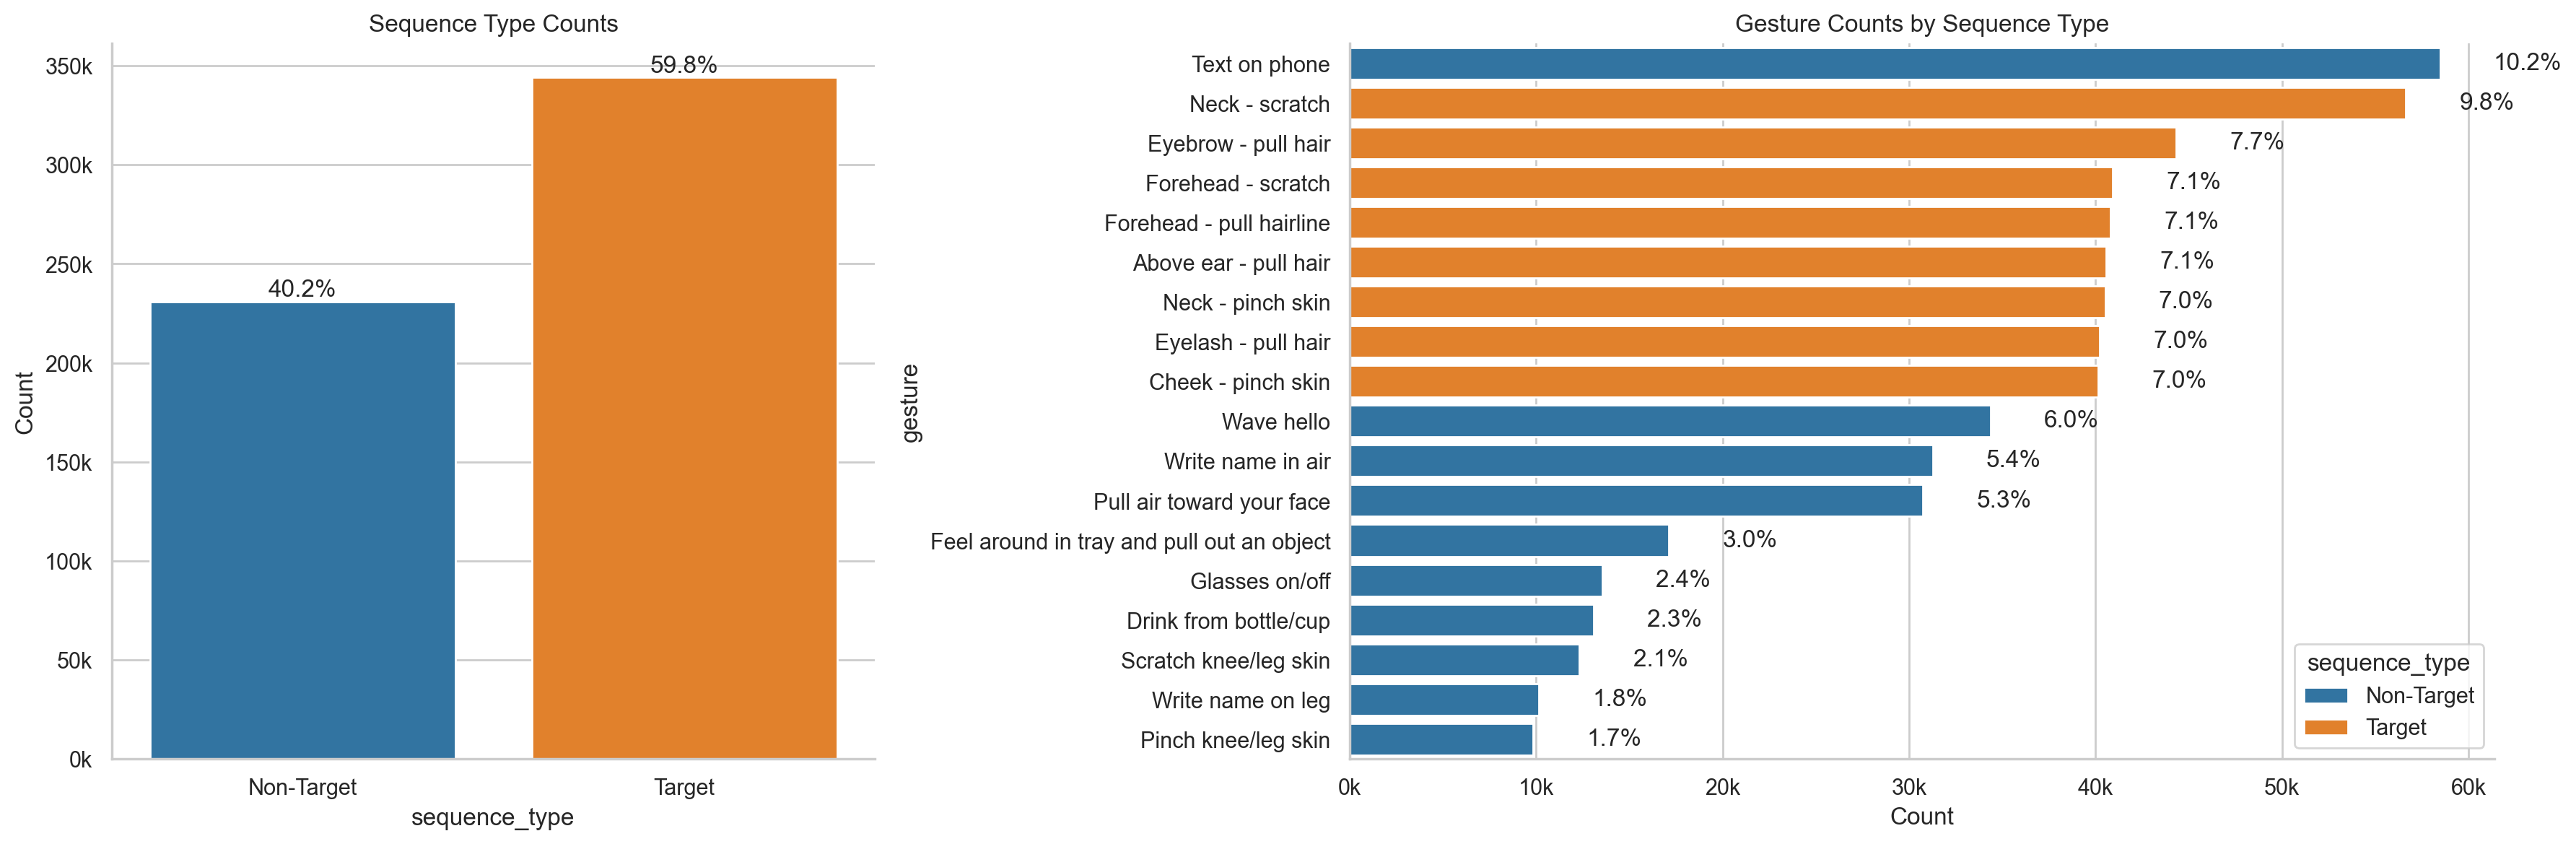

In [326]:
eda.plot_sequence_and_gesture_counts() 